In [74]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.optimize import minimize

%matplotlib inline
sns.set()

In [75]:
h = 6.626e-34
m = 9.109e-31
e = 1.602e-19

In [76]:
# Динамический метод
din_data = pd.read_excel("din.xlsx")
E1, E2 = (din_data['null'].values[0] - din_data['max'].values[0])*5, (din_data['null'].values[0] - din_data['min'].values[0])*5
E_err = 0.1
L = 1e10*(h*5**0.5)/(32*m*e*(E2-E1))**0.5
L_err = 1e10*E_err*32*m*e*(h*5**0.5)/(32*m*e*(E2-E1))**1.5
print("L = {:.2}".format(L), "+-", "{:.1}".format(L_err), "Angstrom")

L = 2.1 +- 0.02 Angstrom


In [77]:
U_0 = E2*4/5 - E1*9/5
print("U_0 = {:.2}".format(U_0), "+-", "{:.1}".format(E_err), "эВ")

U_0 = 3.8 +- 0.1 эВ


L = 1.4 +- 0.005 Angstrom


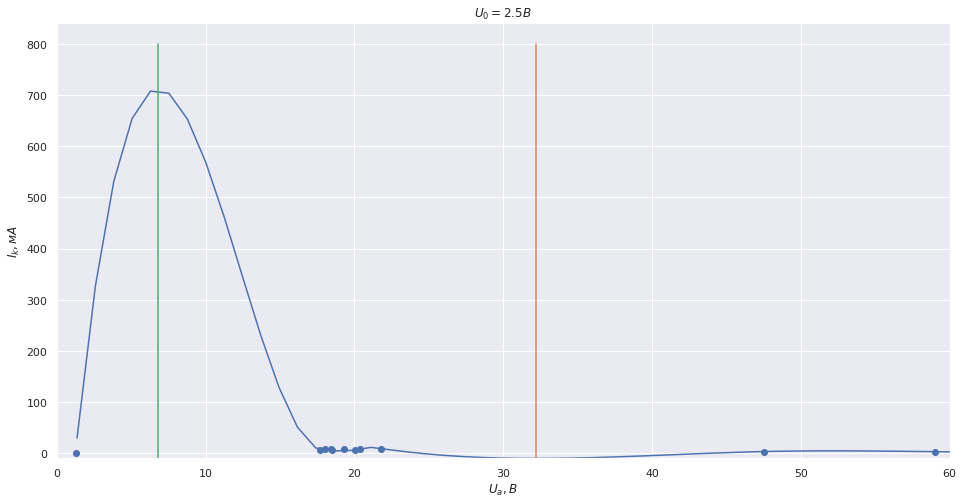

In [78]:
# Статический метод
stat_data = pd.read_excel("stat.xlsx")
fig, axes = plt.subplots(1, figsize=(16, 8))
X, Y = stat_data["U"].values, stat_data["I"].values
f = interp1d(X, Y, kind='cubic')
axes.plot(X, Y, "bo")
a = np.linspace(min(X)+0.1, max(X)-0.1, 100)
axes.plot(a, f(a))
minim, maxim = minimize(f, 40).x[0], minimize(lambda x: -f(x), 10).x[0]
axes.plot([minim]*100, np.linspace(-10, 800, 100))
axes.plot([maxim]*100, np.linspace(-10, 800, 100))
axes.set_ylim(-10)
axes.set_xlim(0, 60)
axes.set_xlabel("$U_a, В$")
axes.set_ylabel("$I_k, мА$")
axes.set_title("$U_0=2.5В$")
L = 1e10*(h*5**0.5)/(32*m*e*(minim-maxim))**0.5
L_err = 1e10*E_err*32*m*e*(h*5**0.5)/(32*m*e*(minim-maxim))**1.5
print("L = {:.2}".format(L), "+-", "{:.1}".format(L_err), "Angstrom")

In [79]:
U_0 = minim*4/5 - maxim*9/5
print("U_0 = {:.2}".format(U_0), "+-", "{:.1}".format(E_err), "эВ")

U_0 = 1.4e+01 +- 0.1 эВ
